# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
metadata_results=study_results.merge(mouse_metadata,how='left' )

# Display the data table for preview
metadata_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [52]:
# Checking the number of mice.
mouse_counts = metadata_results['Mouse ID'].nunique()
mouse_counts

249

In [53]:
# Our data should be uniquely identified by Mouse ID and Timepoint
metadata_results_un=metadata_results[['Mouse ID', 'Timepoint']].drop_duplicates()

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = metadata_results[metadata_results.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicates['Mouse ID'].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [85]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicates_df=metadata_results.loc[metadata_results['Mouse ID'] == "g989", :]
duplicates_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.00000000,0,Propriva,Female,21,26
137,g989,0,45.00000000,0,Propriva,Female,21,26
329,g989,5,48.78680146,0,Propriva,Female,21,26
360,g989,5,47.57039208,0,Propriva,Female,21,26
620,g989,10,51.74515613,0,Propriva,Female,21,26
681,g989,10,49.88052780,0,Propriva,Female,21,26
815,g989,15,51.32585207,1,Propriva,Female,21,26
869,g989,15,53.44201976,0,Propriva,Female,21,26
950,g989,20,55.32612202,1,Propriva,Female,21,26
1111,g989,20,54.65765008,1,Propriva,Female,21,26


In [89]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

micedata_df= metadata_results[metadata_results['Mouse ID'].isin(duplicate_mice_ids)==False]
micedata_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [90]:
# Checking the number of mice in the clean DataFrame.
micedata_count = micedata_df['Mouse ID'].nunique()
micedata_count

248

## Summary Statistics

In [91]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


mean = micedata_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]

median = micedata_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
variance = micedata_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
deviation = micedata_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
sem = micedata_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]


summary_statistics_dataframe = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume":median,  "Tumor Volume Variance":variance,  "Tumor Volume Std. Dev.": deviation, "Tumor Volume Std. Err.": sem})

summary_statistics_dataframe


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.6757411410,41.557808880,24.9477641203,4.9947736806,0.3293456234
Ceftamin,52.5911718096,51.776157280,39.2901772733,6.2681877184,0.4698205328
Infubinol,52.8847951086,51.820584380,43.1286841288,6.5672432671,0.4922356938
Ketapril,55.2356376405,53.698742645,68.5535771124,8.2797087577,0.6038598238
Naftisol,54.3315646583,52.509284610,66.1734789874,8.1347082915,0.5964657512
Placebo,54.0335807864,52.288934090,61.1680829367,7.8210026810,0.5813305511
Propriva,52.3209298600,50.446266345,43.8520130130,6.6220852466,0.5443320542
Ramicane,40.2167450667,40.673235540,23.4867039521,4.8463082808,0.3209546065
Stelasyn,54.2331491199,52.431736640,59.4505616734,7.7104190336,0.5731109333


In [92]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
import numpy as np
micedata_df_group_adv=micedata_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
summary_stats = micedata_df_group_adv.agg(mean='mean',median='median',variance='var',std_dev='std',
    SEM=lambda x: np.std(x, ddof=1) / np.sqrt(len(x))).reset_index()

summary_stats.columns = ['Drug Regimen', 'Mean', 'Median', 'Var', 'Std', 'SEM']

summary_stats

,Drug Regimen,Mean,Median,Var,Std,SEM
0,Capomulin,40.6757411410,41.557808880,24.9477641203,4.9947736806,0.3293456234
1,Ceftamin,52.5911718096,51.776157280,39.2901772733,6.2681877184,0.4698205328
2,Infubinol,52.8847951086,51.820584380,43.1286841288,6.5672432671,0.4922356938
3,Ketapril,55.2356376405,53.698742645,68.5535771124,8.2797087577,0.6038598238
4,Naftisol,54.3315646583,52.509284610,66.1734789874,8.1347082915,0.5964657512
5,Placebo,54.0335807864,52.288934090,61.1680829367,7.8210026810,0.5813305511
6,Propriva,52.3209298600,50.446266345,43.8520130130,6.6220852466,0.5443320542
7,Ramicane,40.2167450667,40.673235540,23.4867039521,4.8463082808,0.3209546065
8,Stelasyn,54.2331491199,52.431736640,59.4505616734,7.7104190336,0.5731109333
9,Zoniferol,53.2365065516,51.818479325,48.5333553894,6.9665885044,0.5163978968


## Bar and Pie Charts

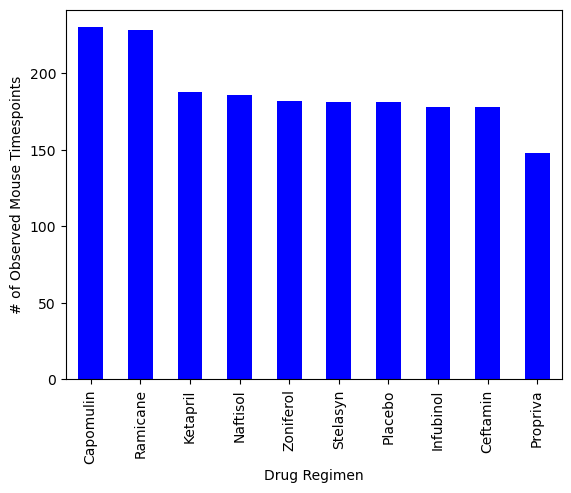

In [112]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = micedata_df['Drug Regimen'].value_counts().reset_index()

regimen_counts.columns = ['Drug Regimen', 'Count']

df=pd.DataFrame(regimen_counts)
df.plot(kind='bar', x='Drug Regimen', y='Count', color='blue', legend=False)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timespoints')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

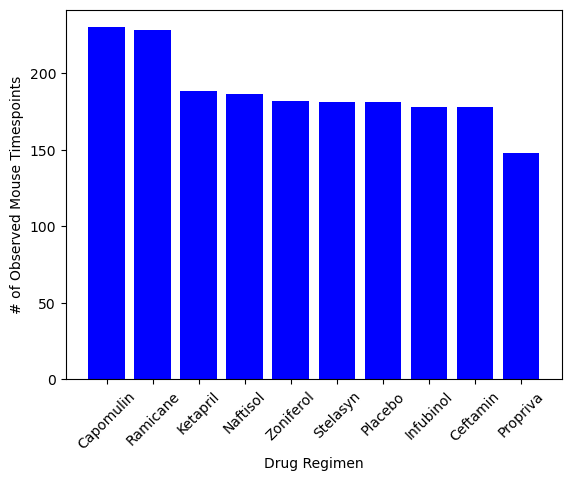

In [113]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = micedata_df['Drug Regimen'].value_counts()
plt.bar(regimen_counts.index, regimen_counts.values, color='blue')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timespoints')
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

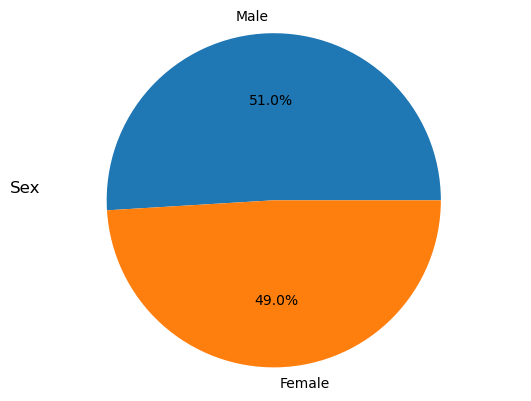

In [160]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df=pd.DataFrame(micedata_df)
counts = df['Sex'].value_counts()

sex_counts_df = pd.DataFrame(counts).reset_index()
sex_counts_df.columns = ['Sex', 'Count']

plt.pie(sex_counts_df['Count'], labels=sex_counts_df['Sex'],autopct='%1.1f%%')
plt.title('Sex', x=-0.0, y=0.5)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

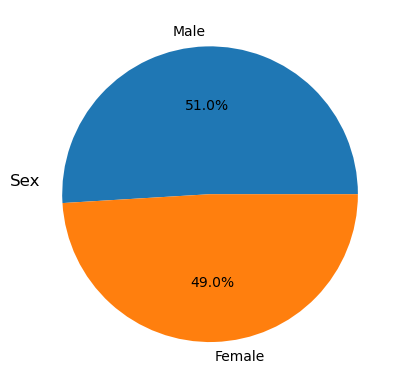

In [162]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig, ax = plt.subplots()
plt.title('Sex', x=-0.0, y=0.5)
ax.pie(sex_counts_df['Count'],labels=sex_counts_df['Sex'] , autopct='%1.1f%%', )
plt.show

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


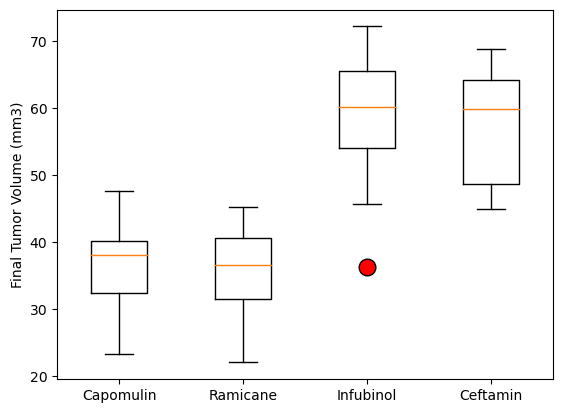

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

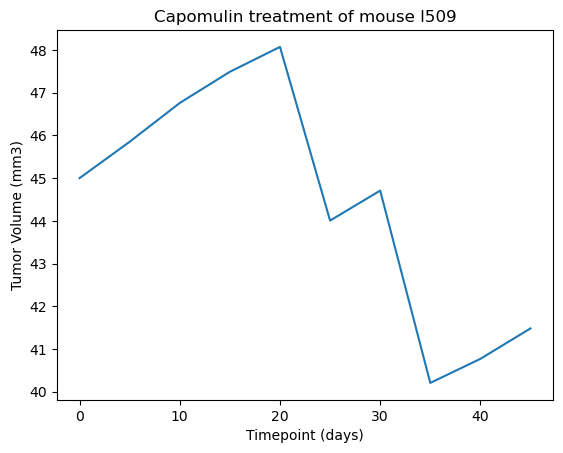

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot()
plt.title("Campomulin treatment of mouse 1509")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

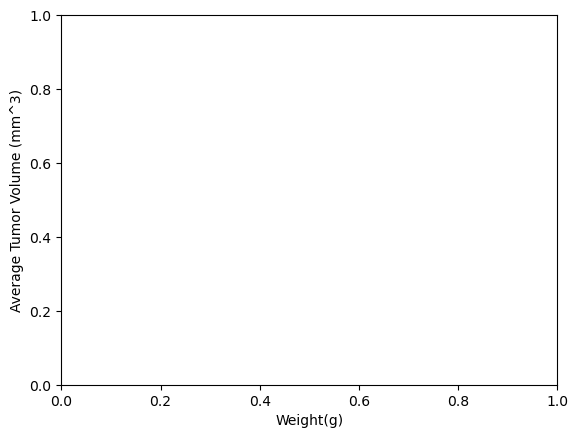

In [37]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#plt.scatter()
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


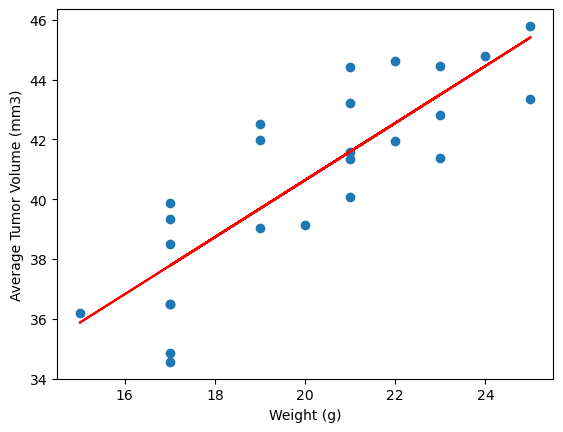

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
